In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Подгружаем эмбеддинги

In [2]:
# загрузка сохранённых эмбеддингов
with open('embeddings_resnet_train.pkl', 'rb') as f:
    dtr_r = pickle.load(f)
with open('embeddings_resnet_test.pkl', 'rb') as f:
    dte_r = pickle.load(f)

Xtr_resnet = np.asarray(dtr_r['X'], dtype=np.float32)
ytr_resnet = np.asarray(dtr_r['y'], dtype=np.int64)
Xte_resnet = np.asarray(dte_r['X'], dtype=np.float32)
yte_resnet = np.asarray(dte_r['y'], dtype=np.int64)

with open('embeddings_simplecnn_train.pkl', 'rb') as f:
    dtr_s = pickle.load(f)
with open('embeddings_simplecnn_test.pkl', 'rb') as f:
    dte_s = pickle.load(f)

Xtr_simple = np.asarray(dtr_s['X'], dtype=np.float32)
ytr_simple = np.asarray(dtr_s['y'], dtype=np.int64)
Xte_simple = np.asarray(dte_s['X'], dtype=np.float32)
yte_simple = np.asarray(dte_s['y'], dtype=np.int64)

num_classes = len(np.unique(ytr_resnet))
print('ResNet:', Xtr_resnet.shape, Xte_resnet.shape, 'classes:', num_classes)
print('SimpleCNN:', Xtr_simple.shape, Xte_simple.shape, 'classes:', len(np.unique(ytr_simple)))

embeddings = {
    'resnet': (Xtr_resnet, ytr_resnet, Xte_resnet, yte_resnet),
    'simplecnn': (Xtr_simple, ytr_simple, Xte_simple, yte_simple),
}

ResNet: (10000, 512) (2000, 512) classes: 10
SimpleCNN: (10000, 4096) (2000, 4096) classes: 10


In [3]:
bundle_path = 'embeddings_bundle.pkl'
with open(bundle_path, 'wb') as f:
    pickle.dump(embeddings, f)
print('Saved embeddings bundle ->', bundle_path)

Saved embeddings bundle -> embeddings_bundle.pkl


Возьмём 3 pca-компоненты и построим попарные проекции (PC1–PC2/PC1–PC3/PC2–PC3) для эмбеддингов

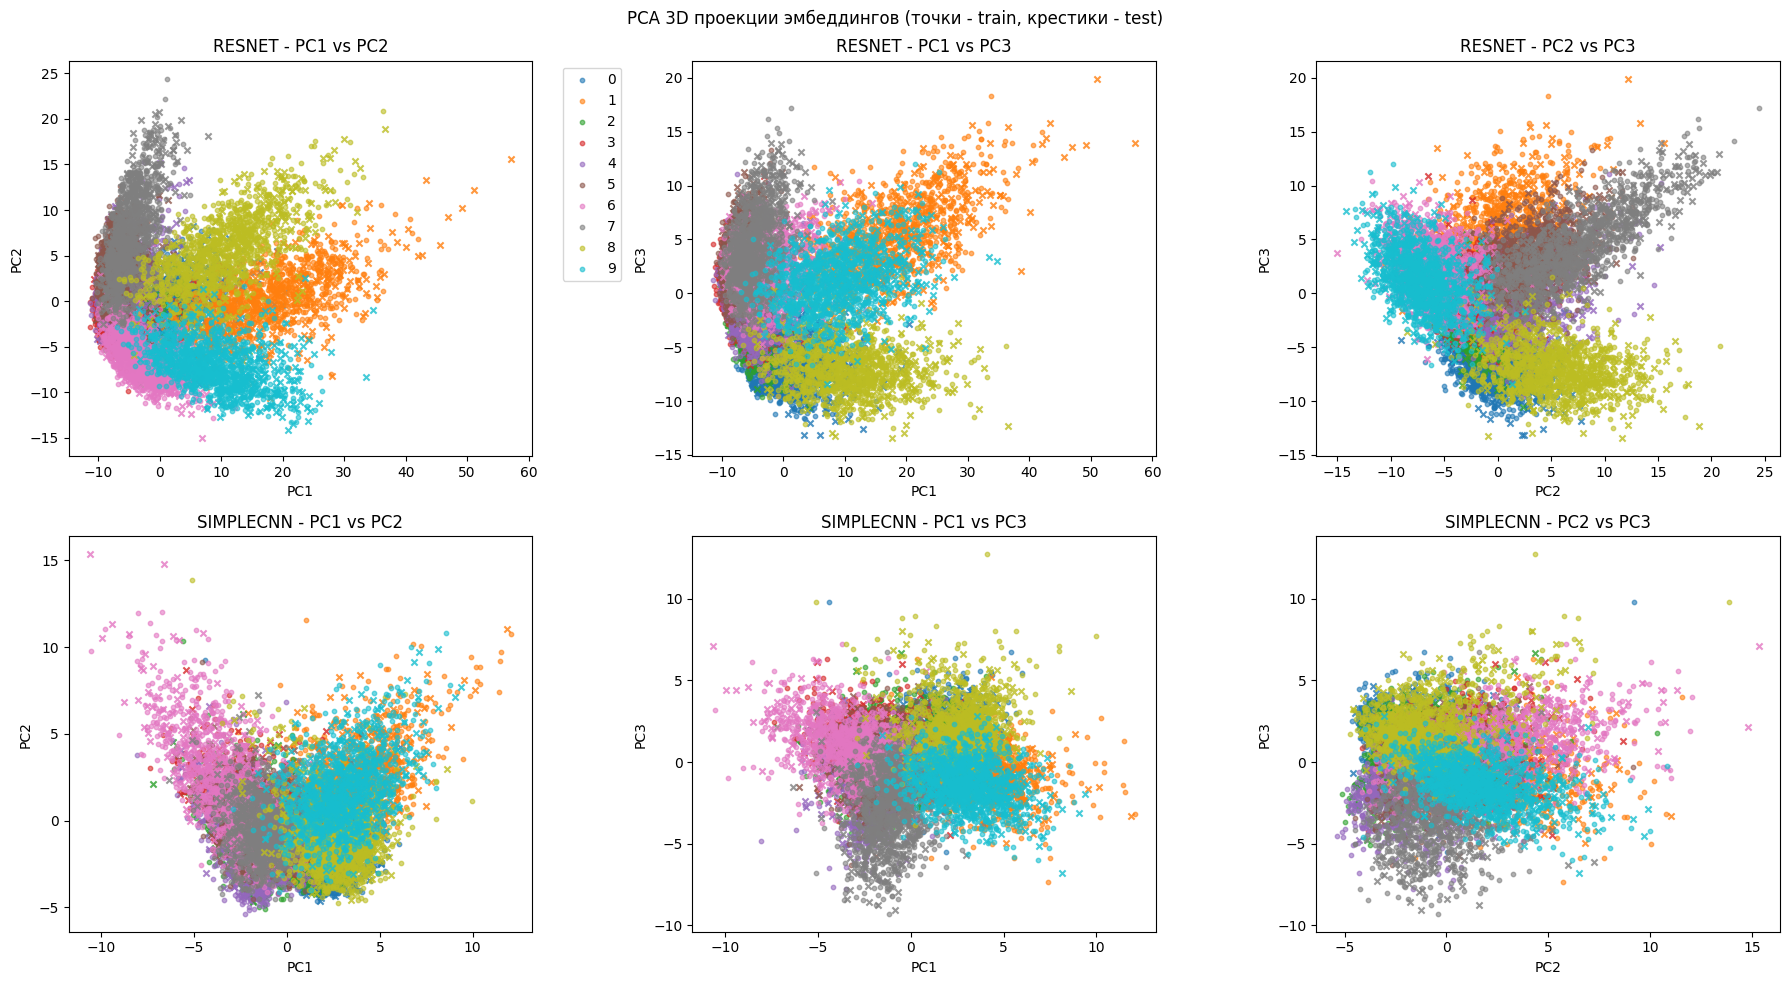

In [4]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

pairs = [(0,1), (0,2), (1,2)]  # (PC1,PC2), (PC1,PC3), (PC2,PC3)

for row_idx, (name, (X_train, y_train, X_test, y_test)) in enumerate(embeddings.items()):
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for col_idx, (comp1, comp2) in enumerate(pairs):
        ax = axes[row_idx, col_idx]
        for cls in range(10):
            train_mask = y_train == cls
            test_mask = y_test == cls
            ax.scatter(X_train_pca[train_mask, comp1], X_train_pca[train_mask, comp2],
                       c=[colors[cls]], label=f'{cls}' if (row_idx == 0 and col_idx == 0) else None,
                       alpha=0.6, s=10)
            ax.scatter(X_test_pca[test_mask, comp1], X_test_pca[test_mask, comp2],
                       c=[colors[cls]], marker='x', alpha=0.8, s=20)
        ax.set_xlabel(f'PC{comp1+1}')
        ax.set_ylabel(f'PC{comp2+1}')
        ax.set_title(f'{name.upper()} - PC{comp1+1} vs PC{comp2+1}')

axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('PCA 3D проекции эмбеддингов (точки - train, крестики - test)', y=0.98)
plt.tight_layout()
plt.show()